In [ ]:
import pandas as np
wais=np.read_csv("https://raw.githubusercontent.com/THEFASHIONGEEK/DATA-SCIENCE/master/Simple%20Linear%20Regression/wc.at.csv")
wais.head()
wais.describe()

,Waist,AT
count,109.000000,109.000000
mean,91.901835,101.894037
std,13.559116,57.294763
min,63.500000,11.440000
25%,80.000000,50.880000
50%,90.800000,96.540000
75%,104.000000,137.000000
max,121.000000,253.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4955595a90>,
      dtype=object)

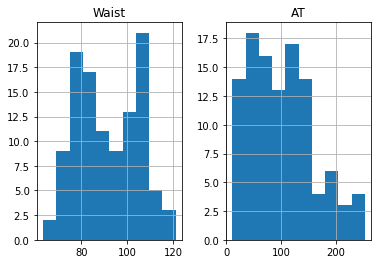

In [ ]:
wais.hist()

In [ ]:
from scipy import stats #Shapiro used to find whether the data is normal distributed or not(if p value is higher than alpha this is not in normal distribution)
stats.shapiro(wais.Waist)

(0.9558576345443726, 0.0011704121716320515)

In [ ]:
from scipy import stats
stats.shapiro(wais.AT)

(0.9523370862007141, 0.0006539996829815209)

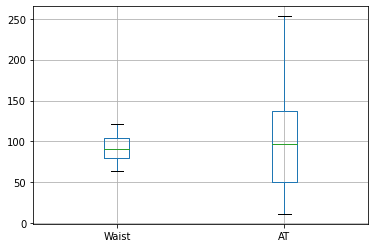

In [ ]:
wais.boxplot()

{'boxes': [<matplotlib.lines.Line2D at 0x7f4946cd0410>],
 'caps': [<matplotlib.lines.Line2D at 0x7f4946cf4810>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f4946cfc850>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f4946cfc310>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f4946cf0d50>,
  <matplotlib.lines.Line2D at 0x7f4946cf42d0>]}

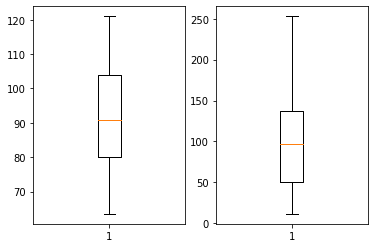

In [ ]:
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.boxplot(wais.Waist)
plt.subplot(1,2,2)
plt.boxplot(wais.AT)

In [ ]:
import pandas as np
wais=np.read_csv("https://raw.githubusercontent.com/THEFASHIONGEEK/DATA-SCIENCE/master/Simple%20Linear%20Regression/wc.at.csv")

wais.iloc[:87]


,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
82,110.00,153.00
83,112.00,158.00
84,108.50,183.00
85,104.00,184.00


In [ ]:
wais.iloc[87:]


,Waist,AT
87,108.5,159.00
88,121.0,245.00
89,109.0,137.00
90,97.5,165.00
91,105.5,152.00
92,98.0,181.00
93,94.5,80.95
94,97.0,137.00
95,105.0,125.00
96,106.0,241.00


In [ ]:
train=wais.iloc[:87]
test=wais.iloc[87:]

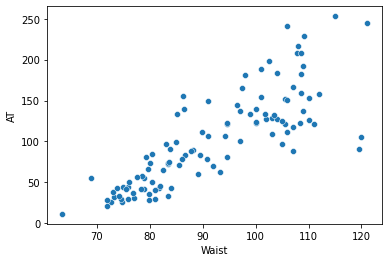

In [ ]:
import seaborn as sns
sns.scatterplot(x="Waist",y="AT",data=wais)

In [ ]:
from scipy import stats
stats.pearsonr(wais.Waist,wais.AT) #In output 1st correlation coefficient, 2nd P-value  

(0.8185578128958533, 1.6186065693841312e-27)

In [ ]:
import statsmodels.api as sm #to create the line equation y=mx+c
train_x=train.Waist
train_y=train.AT
train_x=sm.add_constant(train_x)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
model=sm.OLS(train_y,train_x).fit()
print(model.summary()) 
#r squared represent the acurracy of prediction more preferrable is adjacent r squared
# coef of constant is C, coeff of waist can be written as AT=2.85(Waist)-166
#std.err=sigman/n in confident interval
#p>t represent the pvalue
#[0.025 0.975] represent the confident level
#residual represent the distance between the point from the line

                            OLS Regression Results                            
Dep. Variable:                     AT   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     159.4
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           3.42e-21
Time:                        03:54:15   Log-Likelihood:                -410.85
No. Observations:                  87   AIC:                             825.7
Df Residuals:                      85   BIC:                             830.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -166.3202     20.170     -8.246      0.0

In [ ]:
model.params #only the line equation value

const   -166.32024
Waist      2.83138
dtype: float64

In [ ]:
model.predict(train_x)

0      45.325382
1      39.237916
2      65.286607
3      71.374073
4      45.042244
         ...    
82    145.131511
83    150.794270
84    140.884442
85    128.143234
86    147.962890
Length: 87, dtype: float64

In [ ]:
import statsmodels.api as sm #to create the line equation y=mx+c
test_x=test.Waist
test_y=test.AT
test_x=sm.add_constant(test_x)
predi=model.predict(test_x)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


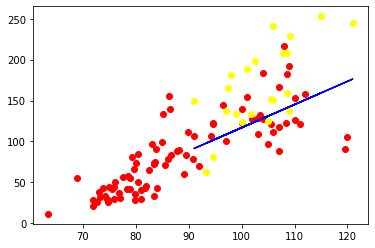

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(train.Waist,train.AT,color="red")
plt.scatter(test.Waist,test.AT,color="yellow")
plt.plot(test.Waist,predi,color="blue")
plt.show()